<a href="https://colab.research.google.com/github/yorkulibraries/notebooks/blob/main/yorkspace_audit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import requests
import pandas as pd

In [3]:
from google.colab import auth
auth.authenticate_user()

import gspread
from gspread_dataframe import set_with_dataframe
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)
spreadsheet = gc.open_by_key('1_j2-7xBFUqmZCcQYj1WJIZtAVuEwh2glPKqTrlgymrM')

In [3]:
york50_audit = spreadsheet.worksheet("york50_audit")
york50_handles = ("https://docs.google.com/spreadsheets/d/1_j2-7xBFUqmZCcQYj1WJIZtAVuEwh2glPKqTrlgymrM/edit#gid=339272735").replace('/edit#gid=', '/export?format=csv&gid=')

In [4]:
york50_df = pd.read_csv(york50_handles)
york50_df

,yorkspace_url
0,https://yorkspace.library.yorku.ca/xmlui/handl...
1,https://yorkspace.library.yorku.ca/xmlui/handl...
2,https://yorkspace.library.yorku.ca/xmlui/handl...
3,https://yorkspace.library.yorku.ca/xmlui/handl...
4,https://yorkspace.library.yorku.ca/xmlui/handl...
...,...
285,https://yorkspace.library.yorku.ca/xmlui/handl...
286,https://yorkspace.library.yorku.ca/xmlui/handl...
287,https://yorkspace.library.yorku.ca/xmlui/handl...
288,https://yorkspace.library.yorku.ca/xmlui/handl...


In [5]:
york50_df['status_code'] = york50_df.apply(lambda row: str(requests.get(row.yorkspace_url, allow_redirects=False).status_code), axis=1)
york50_df['yudl_url'] = york50_df.apply(lambda row: requests.get(row.yorkspace_url, allow_redirects=False).headers['Location'] if requests.get(row.yorkspace_url, allow_redirects=False).status_code==301 else "", axis=1)
york50_df

,yorkspace_url,status_code,yudl_url
0,https://yorkspace.library.yorku.ca/xmlui/handl...,200,
1,https://yorkspace.library.yorku.ca/xmlui/handl...,301,http://digital.library.yorku.ca/islandora/obje...
2,https://yorkspace.library.yorku.ca/xmlui/handl...,301,http://digital.library.yorku.ca/islandora/obje...
3,https://yorkspace.library.yorku.ca/xmlui/handl...,200,
4,https://yorkspace.library.yorku.ca/xmlui/handl...,301,http://digital.library.yorku.ca/islandora/obje...
...,...,...,...
285,https://yorkspace.library.yorku.ca/xmlui/handl...,301,http://digital.library.yorku.ca/islandora/obje...
286,https://yorkspace.library.yorku.ca/xmlui/handl...,301,http://digital.library.yorku.ca/islandora/obje...
287,https://yorkspace.library.yorku.ca/xmlui/handl...,301,http://digital.library.yorku.ca/islandora/obje...
288,https://yorkspace.library.yorku.ca/xmlui/handl...,301,http://digital.library.yorku.ca/islandora/obje...


In [27]:
york50_df.value_counts(['status_code'])

status_code
301            239
200             51
dtype: int64

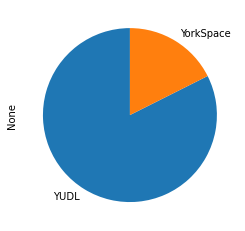

In [17]:
york50_df.value_counts(['status_code']).plot.pie(startangle = 90, labels=['YUDL', 'YorkSpace'])

In [ ]:
set_with_dataframe(york50_audit, york50_df)

In [22]:
photographs_audit = spreadsheet.worksheet("photographs_audit")
photographs_handles = ("https://docs.google.com/spreadsheets/d/1_j2-7xBFUqmZCcQYj1WJIZtAVuEwh2glPKqTrlgymrM/edit#gid=1177513842").replace('/edit#gid=', '/export?format=csv&gid=')

In [23]:
photographs_df = pd.read_csv(photographs_handles)
photographs_df

,yorkspace_url
0,https://yorkspace.library.yorku.ca/xmlui/handl...
1,https://yorkspace.library.yorku.ca/xmlui/handl...
2,https://yorkspace.library.yorku.ca/xmlui/handl...
3,https://yorkspace.library.yorku.ca/xmlui/handl...
4,https://yorkspace.library.yorku.ca/xmlui/handl...
...,...
17883,https://yorkspace.library.yorku.ca/xmlui/handl...
17884,https://yorkspace.library.yorku.ca/xmlui/handl...
17885,https://yorkspace.library.yorku.ca/xmlui/handl...
17886,https://yorkspace.library.yorku.ca/xmlui/handl...


In [24]:
photographs_df['status_code'] = photographs_df.apply(lambda row: str(requests.get(row.yorkspace_url, allow_redirects=False).status_code), axis=1)
photographs_df['yudl_url'] = photographs_df.apply(lambda row: requests.get(row.yorkspace_url, allow_redirects=False).headers['Location'] if requests.get(row.yorkspace_url, allow_redirects=False).status_code==301 else "", axis=1)
photographs_df

,yorkspace_url,status_code,yudl_url
0,https://yorkspace.library.yorku.ca/xmlui/handl...,200,
1,https://yorkspace.library.yorku.ca/xmlui/handl...,301,http://digital.library.yorku.ca/islandora/obje...
2,https://yorkspace.library.yorku.ca/xmlui/handl...,200,
3,https://yorkspace.library.yorku.ca/xmlui/handl...,301,http://digital.library.yorku.ca/islandora/obje...
4,https://yorkspace.library.yorku.ca/xmlui/handl...,200,
...,...,...,...
17883,https://yorkspace.library.yorku.ca/xmlui/handl...,200,
17884,https://yorkspace.library.yorku.ca/xmlui/handl...,301,http://digital.library.yorku.ca/islandora/obje...
17885,https://yorkspace.library.yorku.ca/xmlui/handl...,301,http://digital.library.yorku.ca/islandora/obje...
17886,https://yorkspace.library.yorku.ca/xmlui/handl...,301,http://digital.library.yorku.ca/islandora/obje...


In [28]:
photographs_df.value_counts(['status_code'])

status_code
301            16531
200             1357
dtype: int64

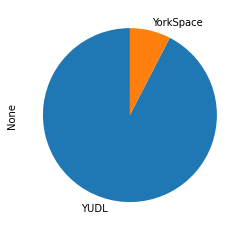

In [25]:
photographs_df.value_counts(['status_code']).plot.pie(startangle = 90, labels=['YUDL', 'YorkSpace'])

In [26]:
set_with_dataframe(photographs_audit, photographs_df)

In [4]:
digital_holdings_audit = spreadsheet.worksheet("digital_holdings_audit")
digital_holdings_handles = ("https://docs.google.com/spreadsheets/d/1_j2-7xBFUqmZCcQYj1WJIZtAVuEwh2glPKqTrlgymrM/edit#gid=320349230").replace('/edit#gid=', '/export?format=csv&gid=')

In [5]:
digital_holdings_df = pd.read_csv(digital_holdings_handles)
digital_holdings_df

,yorkspace_url
0,https://yorkspace.library.yorku.ca/xmlui/handl...
1,https://yorkspace.library.yorku.ca/xmlui/handl...
2,https://yorkspace.library.yorku.ca/xmlui/handl...
3,https://yorkspace.library.yorku.ca/xmlui/handl...
4,https://yorkspace.library.yorku.ca/xmlui/handl...
...,...
143,https://yorkspace.library.yorku.ca/xmlui/handl...
144,https://yorkspace.library.yorku.ca/xmlui/handl...
145,https://yorkspace.library.yorku.ca/xmlui/handl...
146,https://yorkspace.library.yorku.ca/xmlui/handl...


In [6]:
digital_holdings_df['status_code'] = digital_holdings_df.apply(lambda row: str(requests.get(row.yorkspace_url, allow_redirects=False).status_code), axis=1)
digital_holdings_df['yudl_url'] = digital_holdings_df.apply(lambda row: requests.get(row.yorkspace_url, allow_redirects=False).headers['Location'] if requests.get(row.yorkspace_url, allow_redirects=False).status_code==301 else "", axis=1)
digital_holdings_df

,yorkspace_url,status_code,yudl_url
0,https://yorkspace.library.yorku.ca/xmlui/handl...,200,
1,https://yorkspace.library.yorku.ca/xmlui/handl...,200,
2,https://yorkspace.library.yorku.ca/xmlui/handl...,200,
3,https://yorkspace.library.yorku.ca/xmlui/handl...,200,
4,https://yorkspace.library.yorku.ca/xmlui/handl...,200,
...,...,...,...
143,https://yorkspace.library.yorku.ca/xmlui/handl...,200,
144,https://yorkspace.library.yorku.ca/xmlui/handl...,200,
145,https://yorkspace.library.yorku.ca/xmlui/handl...,200,
146,https://yorkspace.library.yorku.ca/xmlui/handl...,200,


In [7]:
digital_holdings_df.value_counts(['status_code'])

status_code
200            148
dtype: int64

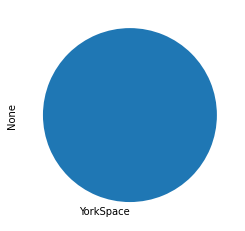

In [8]:
digital_holdings_df.value_counts(['status_code']).plot.pie(startangle = 90, labels=['YorkSpace', 'YUDL'])

In [ ]:
set_with_dataframe(digital_holdings_audit, digital_holdings_df)

In [9]:
sheet_music_audit = spreadsheet.worksheet("sheet_music_audit")
sheet_music_handles = ("https://docs.google.com/spreadsheets/d/1_j2-7xBFUqmZCcQYj1WJIZtAVuEwh2glPKqTrlgymrM/edit#gid=1273659442").replace('/edit#gid=', '/export?format=csv&gid=')

In [10]:
sheet_music_df = pd.read_csv(sheet_music_handles)
sheet_music_df

,yorkspace_url
0,https://yorkspace.library.yorku.ca/xmlui/handl...
1,https://yorkspace.library.yorku.ca/xmlui/handl...
2,https://yorkspace.library.yorku.ca/xmlui/handl...
3,https://yorkspace.library.yorku.ca/xmlui/handl...
4,https://yorkspace.library.yorku.ca/xmlui/handl...
...,...
8824,https://yorkspace.library.yorku.ca/xmlui/handl...
8825,https://yorkspace.library.yorku.ca/xmlui/handl...
8826,https://yorkspace.library.yorku.ca/xmlui/handl...
8827,https://yorkspace.library.yorku.ca/xmlui/handl...


In [11]:
sheet_music_df['status_code'] = sheet_music_df.apply(lambda row: str(requests.get(row.yorkspace_url, allow_redirects=False).status_code), axis=1)
sheet_music_df['yudl_url'] = sheet_music_df.apply(lambda row: requests.get(row.yorkspace_url, allow_redirects=False).headers['Location'] if requests.get(row.yorkspace_url, allow_redirects=False).status_code==301 else "", axis=1)
sheet_music_df

,yorkspace_url,status_code,yudl_url
0,https://yorkspace.library.yorku.ca/xmlui/handl...,200,
1,https://yorkspace.library.yorku.ca/xmlui/handl...,200,
2,https://yorkspace.library.yorku.ca/xmlui/handl...,200,
3,https://yorkspace.library.yorku.ca/xmlui/handl...,200,
4,https://yorkspace.library.yorku.ca/xmlui/handl...,200,
...,...,...,...
8824,https://yorkspace.library.yorku.ca/xmlui/handl...,200,
8825,https://yorkspace.library.yorku.ca/xmlui/handl...,200,
8826,https://yorkspace.library.yorku.ca/xmlui/handl...,200,
8827,https://yorkspace.library.yorku.ca/xmlui/handl...,200,


In [12]:
sheet_music_df.value_counts(['status_code'])

status_code
200            8829
dtype: int64

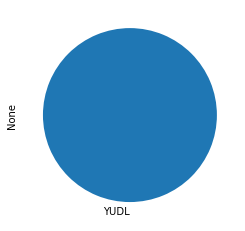

In [13]:
sheet_music_df.value_counts(['status_code']).plot.pie(startangle = 90, labels=['YUDL', 'YorkSpace'])

In [14]:
set_with_dataframe(sheet_music_audit, sheet_music_df)